## Load Libraries 

In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Load Data 

In [112]:
data = pd.read_csv("CreditCardData.csv")
data.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#2546 884,13-Oct-20,23,MasterCard,Tap,£17,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,#2546 895,14-Oct-20,21,Visa,Tap,£28,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0
2,#2546 903,13-Oct-20,19,Visa,Tap,£8,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays,0
3,#2546 906,14-Oct-20,9,MasterCard,PIN,£186,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays,0
4,#2546 920,13-Oct-20,22,Visa,PIN,£86,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo,0


## Extract Data 

In [113]:
data.shape

(100000, 15)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Transaction ID          100000 non-null  object
 1   Date                    100000 non-null  object
 2   Time                    100000 non-null  int64 
 3   Type of Card            100000 non-null  object
 4   Entry Mode              100000 non-null  object
 5   Amount                  100000 non-null  object
 6   Type of Transaction     100000 non-null  object
 7   Merchant Group          100000 non-null  object
 8   Country of Transaction  100000 non-null  object
 9   Shipping Address        100000 non-null  object
 10  Country of Residence    100000 non-null  object
 11  Gender                  100000 non-null  object
 12  Age                     100000 non-null  int64 
 13  Bank                    100000 non-null  object
 14  Fraud                   100000 non-nu

In [115]:
data.isna().sum()

Transaction ID            0
Date                      0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

## Transform Data 

In [116]:
data = data.rename(columns={"Type of Card": "Card_Type", "Entry Mode": "Mode", "Type of Transaction": "Transaction", "Merchant Group": "Merchant_Group","Country of Transaction": "Transaction_Country", "Shipping Address": "Shipping_Address", "Country of Residence": "Residence" })
data.head()

,Transaction ID,Date,Time,Card_Type,Mode,Amount,Transaction,Merchant_Group,Transaction_Country,Shipping_Address,Residence,Gender,Age,Bank,Fraud
0,#2546 884,13-Oct-20,23,MasterCard,Tap,£17,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,#2546 895,14-Oct-20,21,Visa,Tap,£28,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0
2,#2546 903,13-Oct-20,19,Visa,Tap,£8,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays,0
3,#2546 906,14-Oct-20,9,MasterCard,PIN,£186,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays,0
4,#2546 920,13-Oct-20,22,Visa,PIN,£86,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo,0


In [117]:
data = data.drop(data.columns[[0, 1, 2]], axis=1)

In [118]:
data['Amount'] = data['Amount'].str.replace('£', '')
data['Amount']

0         17
1         28
2          8
3        186
4         86
        ... 
99995     30
99996      5
99997    375
99998     12
99999    306
Name: Amount, Length: 100000, dtype: object

In [119]:
data['Amount'] = data['Amount'].astype('int')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Card_Type            100000 non-null  object
 1   Mode                 100000 non-null  object
 2   Amount               100000 non-null  int32 
 3   Transaction          100000 non-null  object
 4   Merchant_Group       100000 non-null  object
 5   Transaction_Country  100000 non-null  object
 6   Shipping_Address     100000 non-null  object
 7   Residence            100000 non-null  object
 8   Gender               100000 non-null  object
 9   Age                  100000 non-null  int64 
 10  Bank                 100000 non-null  object
 11  Fraud                100000 non-null  int64 
dtypes: int32(1), int64(2), object(9)
memory usage: 8.8+ MB


In [121]:
new_data = data 

In [122]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
new_data['Card_Type']= label_encoder.fit_transform(new_data['Card_Type'])
new_data['Mode']= label_encoder.fit_transform(new_data['Mode'])
new_data['Transaction']= label_encoder.fit_transform(new_data['Transaction'])
new_data['Merchant_Group']= label_encoder.fit_transform(new_data['Merchant_Group'])
new_data['Transaction_Country']= label_encoder.fit_transform(new_data['Transaction_Country'])
new_data['Shipping_Address']= label_encoder.fit_transform(new_data['Shipping_Address'])
new_data['Residence']= label_encoder.fit_transform(new_data['Residence'])
new_data['Gender']= label_encoder.fit_transform(new_data['Gender'])
new_data['Bank']= label_encoder.fit_transform(new_data['Bank'])
print(new_data.head())

   Card_Type  Mode  Amount  Transaction  Merchant_Group  Transaction_Country  \
0          0     1      17            1               7                    4   
1          1     1      28            1               5                    4   
2          1     1       8            1               9                    4   
3          0     0     186            0               2                    4   
4          1     0      86            1               0                    4   

   Shipping_Address  Residence  Gender  Age  Bank  Fraud  
0                 2          4       0   36     0      0  
1                 4          4       1   41     7      0  
2                 4          4       1   32     0      0  
3                 4          4       0   65     0      0  
4                 4          4       0   61     6      0  


In [123]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Card_Type            100000 non-null  int32
 1   Mode                 100000 non-null  int32
 2   Amount               100000 non-null  int32
 3   Transaction          100000 non-null  int32
 4   Merchant_Group       100000 non-null  int32
 5   Transaction_Country  100000 non-null  int32
 6   Shipping_Address     100000 non-null  int32
 7   Residence            100000 non-null  int32
 8   Gender               100000 non-null  int32
 9   Age                  100000 non-null  int64
 10  Bank                 100000 non-null  int32
 11  Fraud                100000 non-null  int64
dtypes: int32(10), int64(2)
memory usage: 5.3 MB


## Exploratory Data Analysis (EDA)

In [124]:
new_data.describe()

,Card_Type,Mode,Amount,Transaction,Merchant_Group,Transaction_Country,Shipping_Address,Residence,Gender,Age,Bank,Fraud
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.538120,0.49837,112.566480,0.99968,4.483460,3.283010,3.029080,3.548490,0.508770,53.081630,2.807430,0.071900
std,0.498547,0.50000,123.428493,0.81559,2.888098,1.277455,1.400441,1.071298,0.499926,18.742452,2.484586,0.258324
min,0.000000,0.00000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,0.000000,0.00000,17.000000,0.00000,2.000000,3.000000,2.000000,4.000000,0.000000,37.000000,0.000000,0.000000
50%,1.000000,0.00000,30.000000,1.00000,4.000000,4.000000,4.000000,4.000000,1.000000,53.000000,3.000000,0.000000
75%,1.000000,1.00000,208.000000,2.00000,7.000000,4.000000,4.000000,4.000000,1.000000,69.000000,5.000000,0.000000
max,1.000000,1.00000,400.000000,2.00000,9.000000,4.000000,4.000000,4.000000,1.000000,85.000000,7.000000,1.000000


In [125]:
data.head()

,Card_Type,Mode,Amount,Transaction,Merchant_Group,Transaction_Country,Shipping_Address,Residence,Gender,Age,Bank,Fraud
0,0,1,17,1,7,4,2,4,0,36,0,0
1,1,1,28,1,5,4,4,4,1,41,7,0
2,1,1,8,1,9,4,4,4,1,32,0,0
3,0,0,186,0,2,4,4,4,0,65,0,0
4,1,0,86,1,0,4,4,4,0,61,6,0


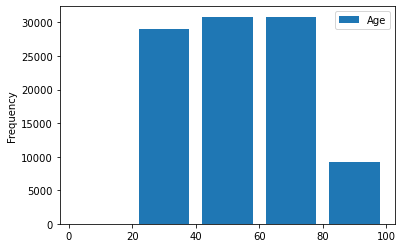

In [126]:
data[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

Text(0.5, 0, 'Cards Type')

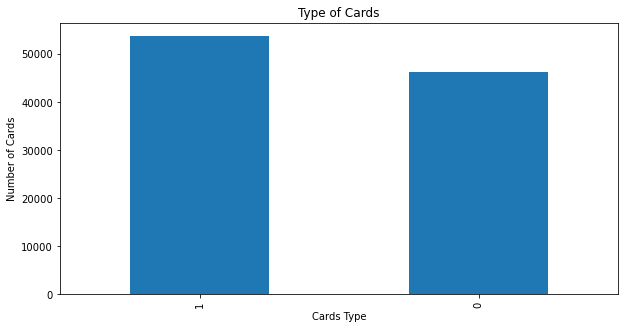

In [127]:
data.Card_Type.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Type of Cards")
plt.ylabel('Number of Cards')
plt.xlabel('Cards Type')

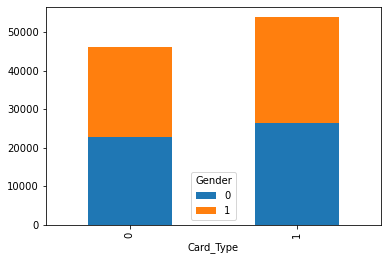

In [128]:
data.groupby(['Card_Type','Gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

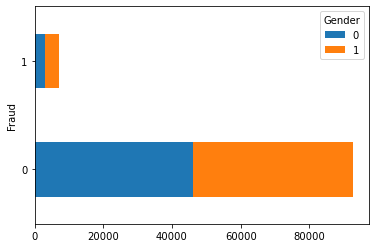

In [129]:
data.groupby(['Fraud','Gender']).size().unstack().plot(kind='barh',stacked=True)
plt.show()

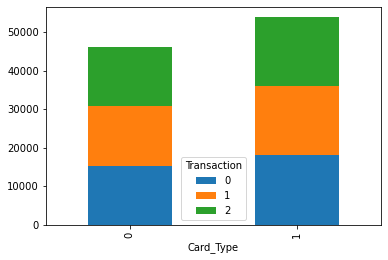

In [130]:
data.groupby(['Card_Type','Transaction']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

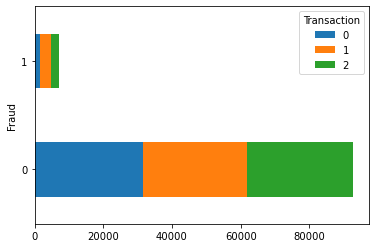

In [131]:
data.groupby(['Fraud','Transaction']).size().unstack().plot(kind='barh',stacked=True)
plt.show()

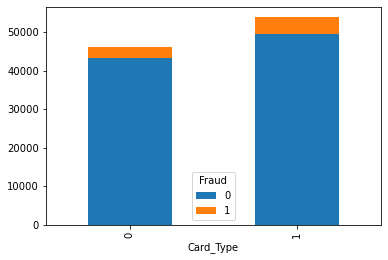

In [132]:
data.groupby(['Card_Type','Fraud']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

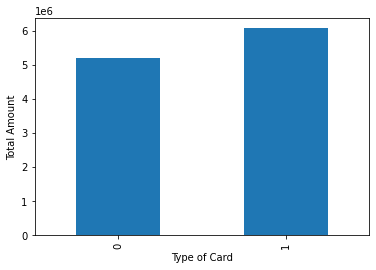

In [133]:
data.groupby('Card_Type').sum()['Amount'].plot(kind='bar',stacked=True)
plt.xlabel('Type of Card')
plt.ylabel('Total Amount')
plt.show()

Text(0.5, 0, 'Bank')

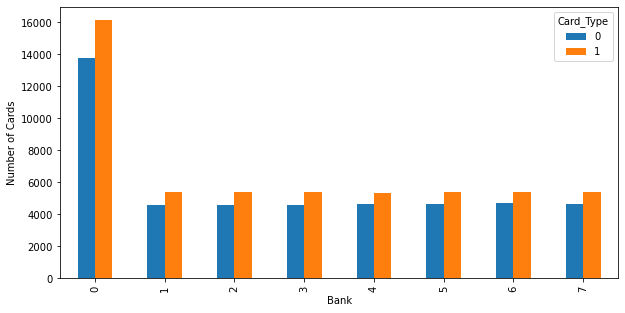

In [134]:
data.groupby(['Bank','Card_Type']).size().unstack().plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of Cards')
plt.xlabel('Bank')

<AxesSubplot:ylabel='Bank'>

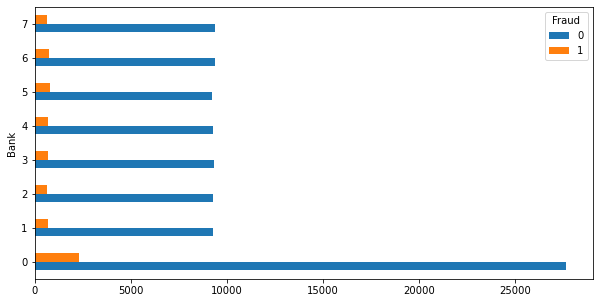

In [135]:
data.groupby(['Bank','Fraud']).size().unstack().plot(kind='barh', figsize=(10,5))

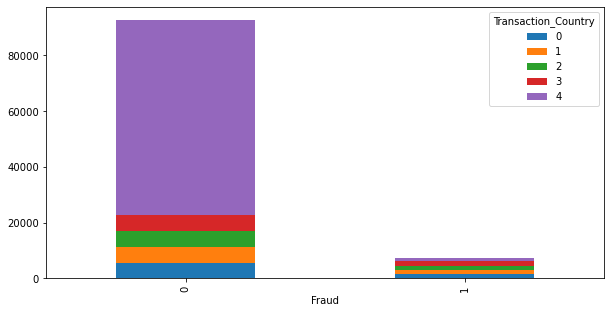

In [136]:
data.groupby(['Fraud','Transaction_Country']).size().unstack().plot(kind='bar',figsize=(10,5), stacked=True)
plt.show()

## Analytical model

In [137]:
feature_cols = ['Card_Type', 'Mode', 'Amount', 'Transaction','Merchant_Group','Transaction_Country','Shipping_Address',
              'Residence', 'Gender', 'Age', 'Bank']
X = new_data[feature_cols] 
y = new_data.Fraud 

In [138]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [140]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [141]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9660666666666666


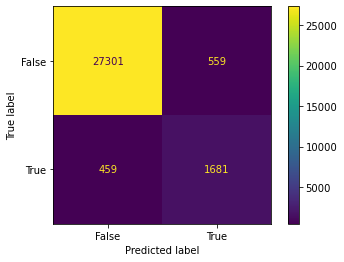

In [142]:
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [143]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
43660,0,0
87278,0,0
14317,0,0
81932,0,0
95321,0,0
5405,0,0
33188,1,0
63421,1,1
72897,0,0
9507,0,0


In [153]:
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(X_train,y_train)

preds = AdaBoost.predict(X_test)
print(preds)
print('Actual labels:    ' ,y_test)

[0 0 0 ... 1 0 0]
Actual labels:     43660    0
87278    0
14317    0
81932    0
95321    0
        ..
994      0
42287    0
4967     1
47725    0
42348    0
Name: Fraud, Length: 30000, dtype: int64


In [154]:
print("Accuracy:",accuracy_score(y_test, preds))

Accuracy: 0.9727666666666667


In [155]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27860
           1       0.83      0.78      0.80      2140

    accuracy                           0.97     30000
   macro avg       0.91      0.88      0.89     30000
weighted avg       0.97      0.97      0.97     30000



In [151]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': preds.flatten()})
df.head(10)

,Actual,Predicted
43660,0,0
87278,0,0
14317,0,0
81932,0,0
95321,0,0
5405,0,0
33188,1,1
63421,1,1
72897,0,0
9507,0,0


In [146]:
model_lr = LogisticRegression(C=100, solver="liblinear").fit(X_train, y_train)
print (model_lr)

LogisticRegression(C=100, solver='liblinear')


In [147]:
predictions_lr = model_lr.predict(X_test)

In [148]:
print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))

Accuracy:  0.9494
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     27860
           1       0.72      0.47      0.57      2140

    accuracy                           0.95     30000
   macro avg       0.84      0.73      0.77     30000
weighted avg       0.94      0.95      0.94     30000



In [150]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_lr.flatten()})
df.head(10)

,Actual,Predicted
43660,0,0
87278,0,0
14317,0,0
81932,0,0
95321,0,0
5405,0,0
33188,1,1
63421,1,0
72897,0,0
9507,0,0
